In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

df = pd.read_csv(io.BytesIO(uploaded['soybean.csv']))


Saving soybean.csv to soybean.csv


In [ ]:
df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [ ]:
df.shape

(683, 36)

In [ ]:
previsoes = df.iloc[:,0:35].values
classe = df.iloc[:,35].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada atributo categórico
lablencoder = LabelEncoder()

colunas = df.shape[1]
for i in range(0,df.shape[1]-1):
  previsoes[:,i] = lablencoder.fit_transform(previsoes[:,i])


In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsoes, classe, test_size=0.3, random_state=0)

In [ ]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
modelo_floresta = RandomForestClassifier(n_estimators=100)
modelo_floresta.fit(x_treinamento, y_treinamento)

RandomForestClassifier()

In [ ]:
modelo_floresta.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=930800186),
 DecisionTreeClassifier(max_features='sqrt', random_state=450858363),
 DecisionTreeClassifier(max_features='sqrt', random_state=1672039384),
 DecisionTreeClassifier(max_features='sqrt', random_state=1587885580),
 DecisionTreeClassifier(max_features='sqrt', random_state=1898381920),
 DecisionTreeClassifier(max_features='sqrt', random_state=860912340),
 DecisionTreeClassifier(max_features='sqrt', random_state=1942176993),
 DecisionTreeClassifier(max_features='sqrt', random_state=572952028),
 DecisionTreeClassifier(max_features='sqrt', random_state=1111997871),
 DecisionTreeClassifier(max_features='sqrt', random_state=1793740664),
 DecisionTreeClassifier(max_features='sqrt', random_state=595007914),
 DecisionTreeClassifier(max_features='sqrt', random_state=1495630630),
 DecisionTreeClassifier(max_features='sqrt', random_state=152237017),
 DecisionTreeClassifier(max_features='sqrt', random_state=382926861),
 DecisionTree

In [ ]:
previws = modelo_floresta.predict(x_teste)
confusao = confusion_matrix(y_teste, previws)
taxa_acerto = accuracy_score(y_teste, previws)
taxa_acerto

0.9414634146341463

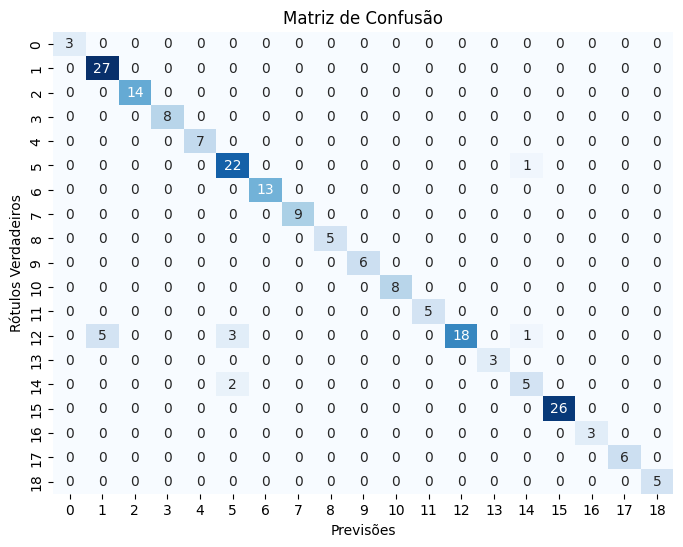

In [ ]:
confusao
# Plotar a matriz de confusão como um gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(confusao, annot=True, cmap='Blues', fmt='g', cbar=False)

# Adicionar rótulos e título
plt.xlabel('Previsões')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

# Exibir o gráfico
plt.show()
